<a href="https://colab.research.google.com/github/MemphisA/econ-finance-data_science/blob/master/OLS_Regression_Industrial_Production_Total_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web


In [32]:
data = web.get_data_fred(['UNRATE','FEDFUNDS','INDPRO'])

In [33]:
data.describe()

,UNRATE,FEDFUNDS,INDPRO
count,59.000000,59.000000,59.000000
mean,5.066102,1.146441,105.654207
std,2.310143,0.831008,4.036646
min,3.500000,0.050000,91.265800
25%,3.800000,0.395000,103.074650
50%,4.200000,1.150000,106.193000
75%,4.900000,1.870000,109.205450
max,14.800000,2.420000,110.551600


In [34]:
data.head()

,UNRATE,FEDFUNDS,INDPRO
DATE,,,
2016-06-01,4.9,0.38,101.8747
2016-07-01,4.8,0.39,102.1325
2016-08-01,4.9,0.40,102.0407
2016-09-01,5.0,0.40,102.0477
2016-10-01,4.9,0.40,102.2485


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2016-06-01 to 2021-04-01
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UNRATE    59 non-null     float64
 1   FEDFUNDS  59 non-null     float64
 2   INDPRO    59 non-null     float64
dtypes: float64(3)
memory usage: 1.8 KB


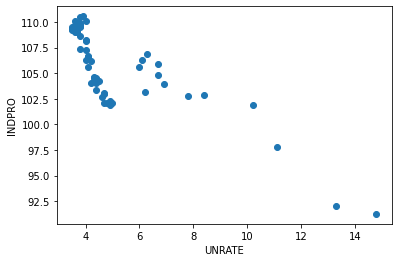

In [36]:
plt.scatter(data.UNRATE,data.INDPRO)
plt.xlabel('UNRATE')
plt.ylabel('INDPRO')
plt.show()

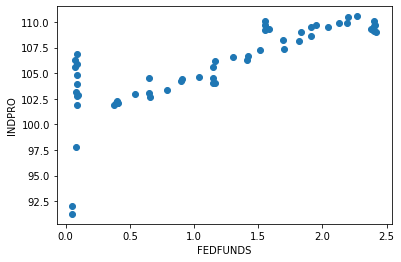

In [37]:
plt.scatter(data.FEDFUNDS,data.INDPRO)
plt.xlabel('FEDFUNDS')
plt.ylabel('INDPRO')
plt.show()

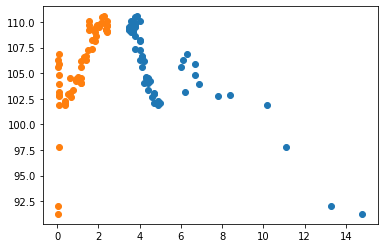

In [38]:
plt.scatter(data.UNRATE,data.INDPRO)
plt.scatter(data.FEDFUNDS,data.INDPRO)
plt.show()

In [39]:
data.corr()

,UNRATE,FEDFUNDS,INDPRO
UNRATE,1.000000,-0.659552,-0.819508
FEDFUNDS,-0.659552,1.000000,0.785546
INDPRO,-0.819508,0.785546,1.000000


In [40]:
data.cov()

,UNRATE,FEDFUNDS,INDPRO
UNRATE,5.336762,-1.266174,-7.642097
FEDFUNDS,-1.266174,0.690575,2.635104
INDPRO,-7.642097,2.635104,16.294509


In [41]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
reg1= 'INDPRO~UNRATE+FEDFUNDS'

In [44]:
regoutput = smf.ols(reg1,data).fit()

In [45]:
print(regoutput.summary())

                            OLS Regression Results                            
Dep. Variable:                 INDPRO   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     98.05
Date:                Fri, 28 May 2021   Prob (F-statistic):           5.07e-19
Time:                        15:33:28   Log-Likelihood:                -121.16
No. Observations:                  59   AIC:                             248.3
Df Residuals:                      56   BIC:                             254.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.9613      1.135     95.129      0.0

In [46]:
uhat = regoutput.resid

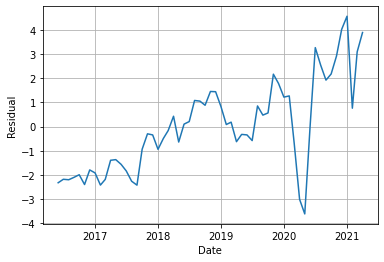

In [47]:
plt.plot(uhat)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.grid(True)
plt.show()

In [48]:
yhat = regoutput.fittedvalues

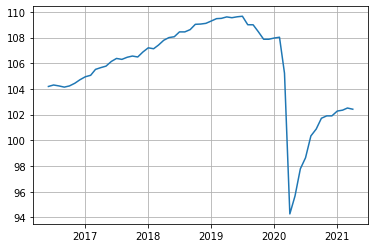

In [49]:
plt.plot(yhat)
plt.grid(True) 

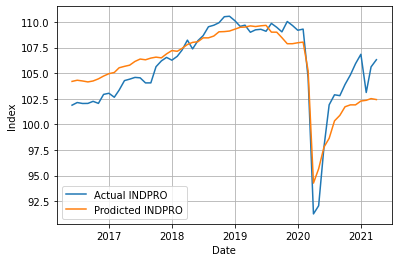

In [50]:
plt.plot(data.INDPRO, label = 'Actual INDPRO')
plt.plot(yhat, label = 'Prodicted INDPRO')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True) 
legend = plt.legend()
plt.show()